In [1]:
# Importacion de librerias a utilizar
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Maenejo simplificado de archivos
files = os.listdir('./Datasets/')
files = [ file for file in files if not(file.endswith('.pdf'))  ]
dict_files = {'df{}'.format(i+1): file for i, file in enumerate(files)}

### ETL Inicial, archivo: **Alternative Fuel Vehicles US.csv**

In [11]:
dict_files['df1']

'Alternative Fuel Vehicles US.csv'

In [12]:
df1 = pd.read_csv('./Datasets/' + dict_files['df1'])
df1.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [49]:
print(df1.duplicated().sum())
df1.drop_duplicates(inplace=True)

1


In [58]:
df1[['Conventional Fuel Economy City','Conventional Fuel Economy Highway', 'Conventional Fuel Economy Combined']]

,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined
0,21.0,22.0,21.0
1,29.0,38.0,32.0
2,28.0,36.0,31.0
3,24.0,30.0,26.0
4,26.0,34.0,29.0
...,...,...,...
877,NaN,NaN,NaN
878,NaN,NaN,NaN
879,NaN,NaN,NaN
880,NaN,NaN,NaN


<Axes: >

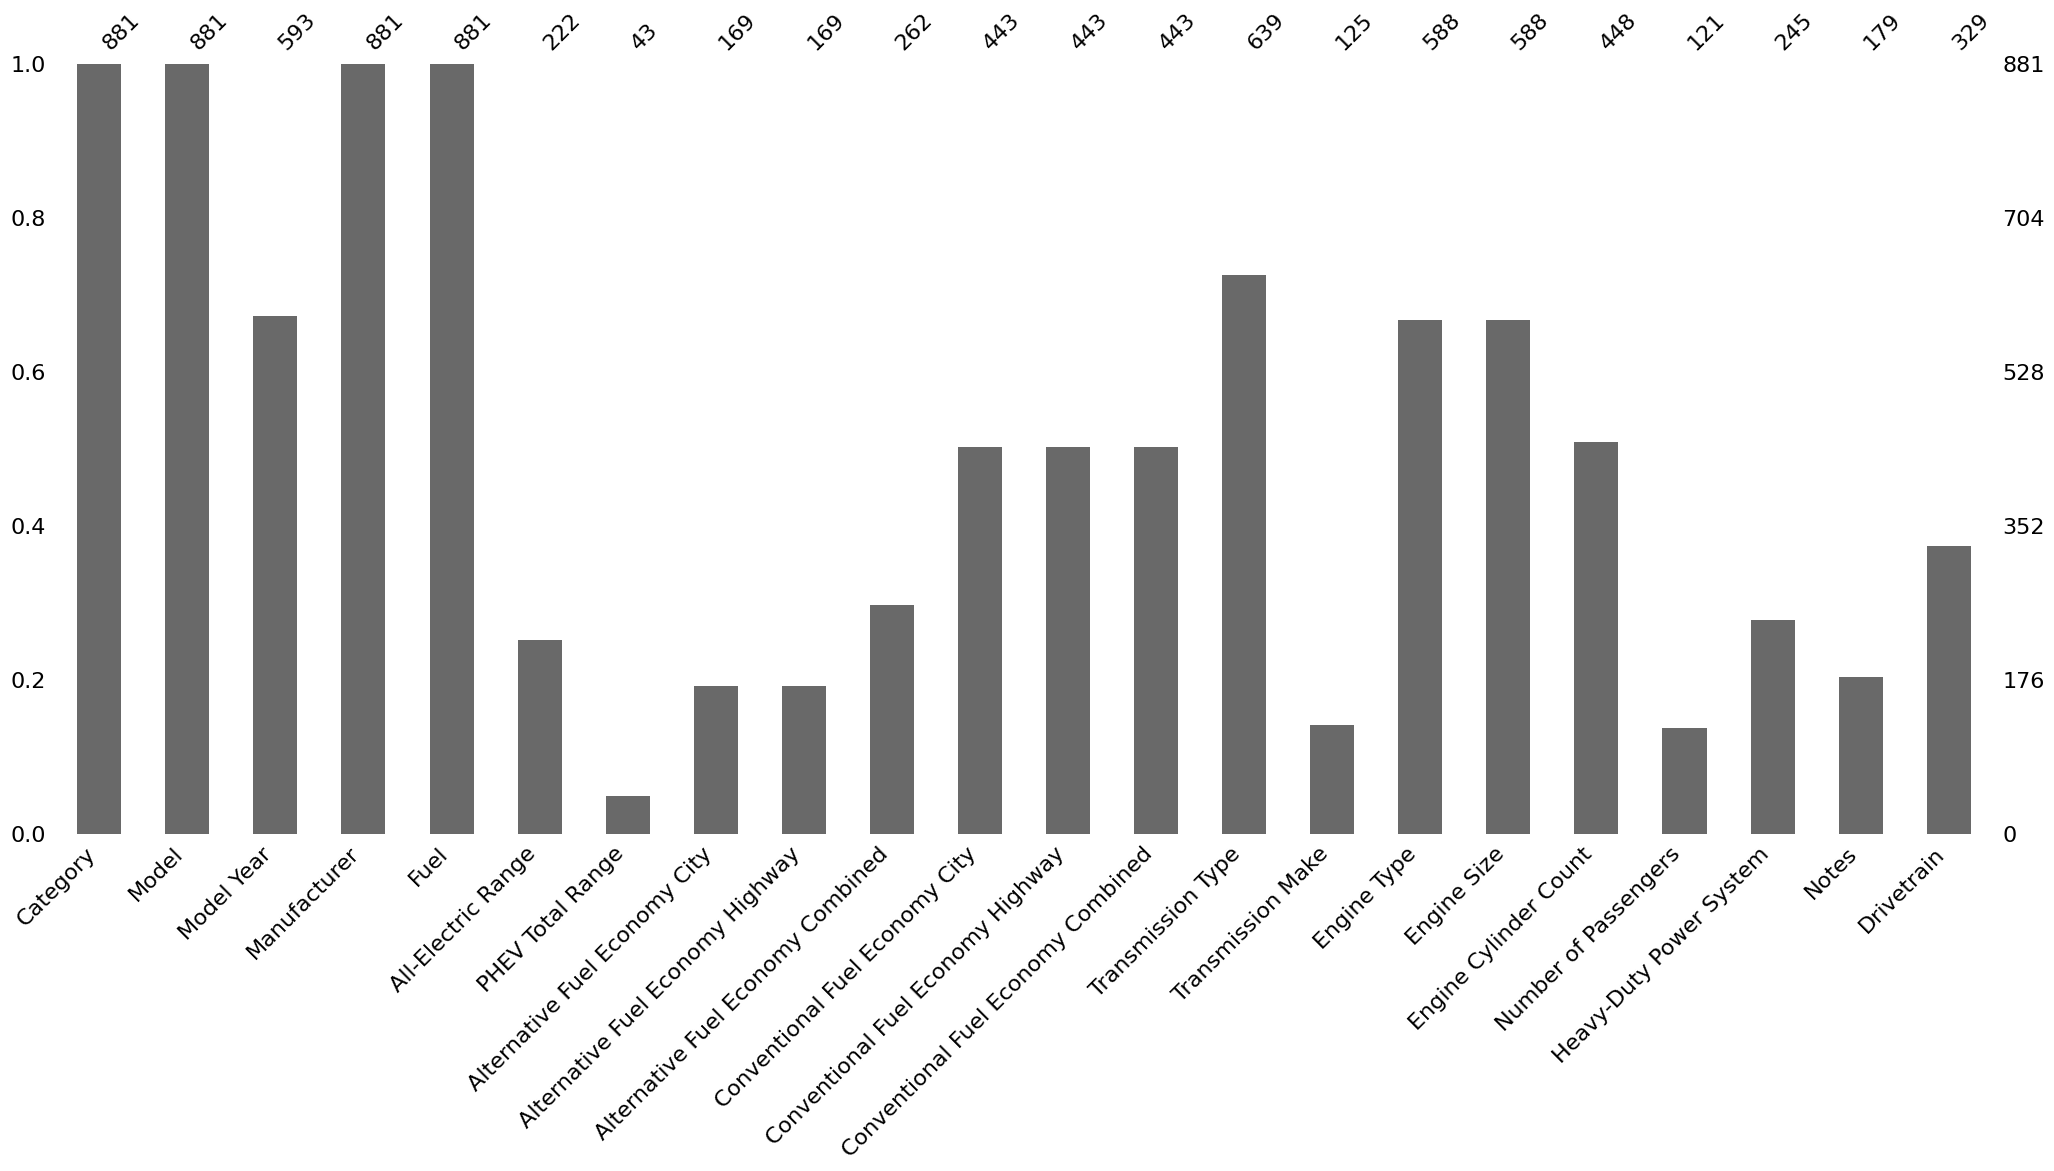

In [51]:
msno.bar(df1)

<Axes: >

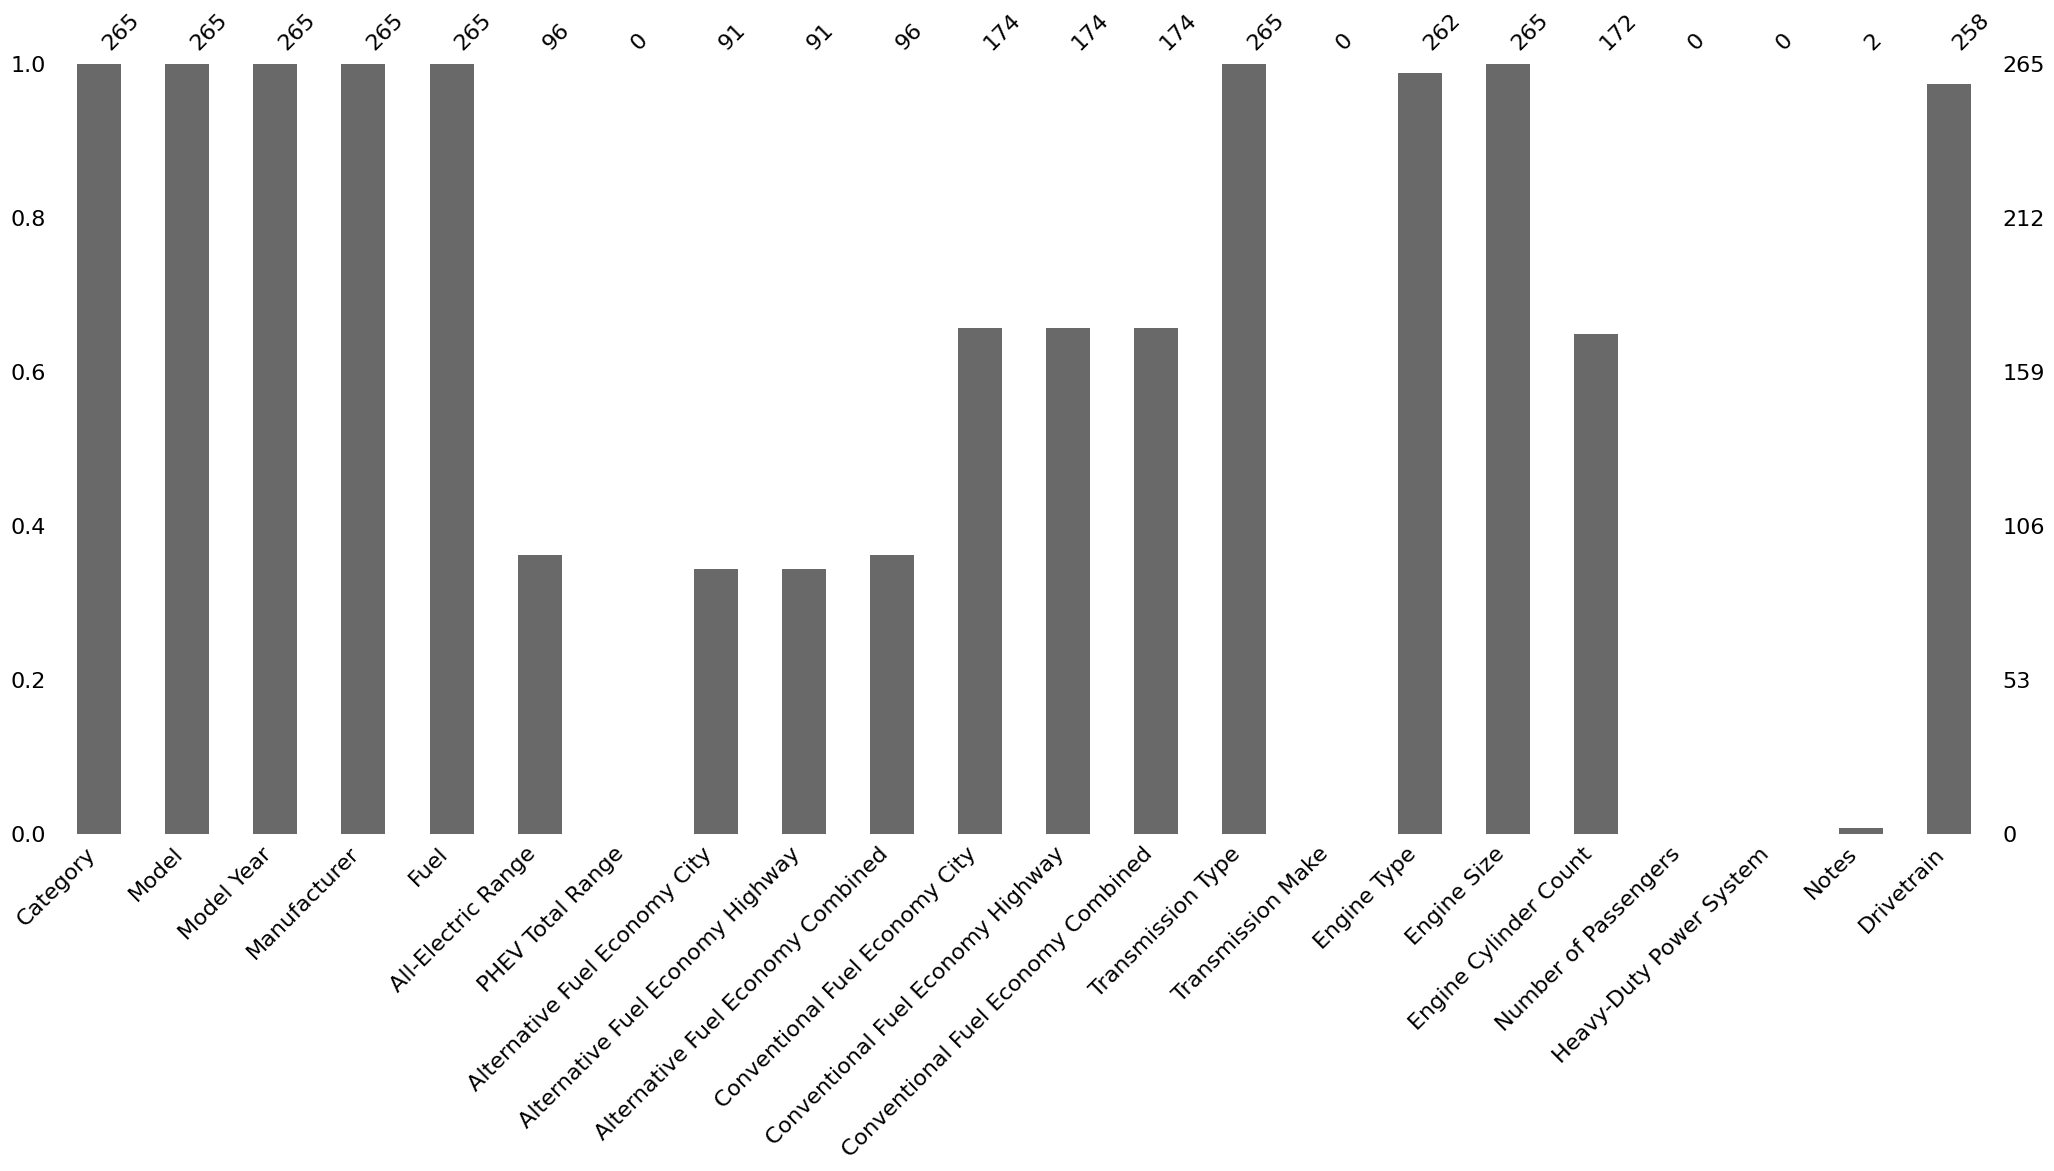

In [73]:
msno.bar(df1[df1.isnull().sum(axis=1) == 9])

Analizando más a fondo, la ausencia de valores, podemos descartar las columnas **PHEV Range**, **Transmission Make**, **Heavy-duty Power System**, **Notes**, y **Numbers of Passangers**. Principalmente por su número de valores faltantes y por su significando en la lógica de negocio. Por otro lado, teniendo el **Engine Size** podríamos descartar **Engine Cylinder Count**, dada la relevancia de esta variable en el consumo final y por ende en la producción de CO2. Además existen otras que posiblemente sean descartadas posteriormente.

In [77]:
df1.columns

Index(['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Transmission Make', 'Engine Type', 'Engine Size',
       'Engine Cylinder Count', 'Number of Passengers',
       'Heavy-Duty Power System', 'Notes', 'Drivetrain'],
      dtype='object')

In [95]:
df1_filtered = df1[['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel', 'All-Electric Range','Alternative Fuel Economy City', 'Alternative Fuel Economy Highway','Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway','Conventional Fuel Economy Combined', 'Transmission Type', 'Engine Type', 'Engine Size', 'Drivetrain']]

In [96]:
# Normalizamos esta columna, donde auto significa Automatic y Automatic|Manual y Manual|Automatic significan lo mismo.
df1_filtered['Transmission Type'].unique()

array(['Auto', nan, 'Automatic', 'Automatic|Manual', 'Manual|Automatic'],
      dtype=object)

In [97]:
df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic|Manual' if x == 'Manual|Automatic' else x)
df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic' if x == 'Auto' else x)

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_4040\3170418216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic|Manual' if x == 'Manual|Automatic' else x)
C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_4040\3170418216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic' if x == 'Auto' else x)


In [108]:
df1_filtered['Model Year'] = df1_filtered['Model Year'].apply(lambda x: int(x) if pd.notnull(x) else int(0))

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_4040\1240827177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['Model Year'] = df1_filtered['Model Year'].apply(lambda x: int(x) if pd.notnull(x) else int(0))
